## **Data  Visualization and Preprocessing**


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


df = pd.read_csv('/content/dataset.csv')


In [101]:
df.columns

Index(['id', 'created_at', 'text', 'lang', 'in_reply_to', 'is_quote_status',
       'quote', 'retweeted_tweet', 'possibly_sensitive',
       'possibly_sensitive_editable', 'quote_count', 'media', 'reply_count',
       'favorite_count', 'favorited', 'view_count', 'retweet_count',
       'editable_until_msecs', 'is_translatable', 'is_edit_eligible',
       'edits_remaining', 'state', 'replies', 'reply_to', 'related_tweets',
       'hashtags', 'poll', 'has_card', 'thumbnail_title', 'thumbnail_url',
       'urls', 'full_text', 'user_id', 'user_created_at', 'user_name',
       'user_screen_name', 'user_profile_image_url', 'user_profile_banner_url',
       'user_url', 'user_location', 'user_description',
       'user_description_urls', 'user_urls', 'user_pinned_tweet_ids',
       'user_blue_verified', 'user_verified', 'user_possibly_sensitive',
       'user_can_dm', 'user_can_media_tag', 'user_want_retweets',
       'user_default_profile', 'user_default_profile_image',
       'user_has_custo

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5042 non-null   int64  
 1   created_at                   5042 non-null   object 
 2   text                         5042 non-null   object 
 3   lang                         5042 non-null   object 
 4   in_reply_to                  367 non-null    float64
 5   is_quote_status              5042 non-null   bool   
 6   quote                        647 non-null    object 
 7   retweeted_tweet              0 non-null      float64
 8   possibly_sensitive           3084 non-null   object 
 9   possibly_sensitive_editable  3084 non-null   object 
 10  quote_count                  5042 non-null   int64  
 11  media                        2517 non-null   object 
 12  reply_count                  5042 non-null   int64  
 13  favorite_count    

In [103]:
df.head()

,id,created_at,text,lang,in_reply_to,is_quote_status,quote,retweeted_tweet,possibly_sensitive,possibly_sensitive_editable,...,user_fast_followers_count,user_normal_followers_count,user_following_count,user_favorites_count,user_listed_count,user_media_count,user_statuses_count,user_is_translator,user_translator_type,user_withheld_in_countries
0,1797309788956565761,Mon Feb 26 22:10:34 +0000 2024,@centregoals He's got to give the impression i...,en,1.796651e+18,False,NaN,NaN,False,True,...,0,1392,1622,17099,8,5975,26205,False,none,[]
1,1796832742870847800,Mon Feb 26 13:02:38 +0000 2024,Al-Hilal wins Al-Nassr by Ronaldo’s side to ta...,en,NaN,False,NaN,NaN,False,True,...,0,40,18,90,0,184,489,False,none,[]
2,1796652503313825902,Sat Mar 02 21:23:12 +0000 2024,Christiano Ronaldo’s tears make me consider ho...,en,NaN,False,NaN,NaN,NaN,NaN,...,0,445,543,30777,8,719,6321,False,regular,[]
3,1785954914138505470,Sat Mar 02 17:58:57 +0000 2024,Cristiano Ronaldo doing what he knows how to d...,en,NaN,False,NaN,NaN,False,True,...,0,1234,76,428,0,5633,8444,False,none,[]
4,1785812170074177945,Fri Mar 01 01:36:42 +0000 2024,Exciting news for football fans! Ronaldo leads...,en,NaN,False,NaN,NaN,False,True,...,0,20,38,1,0,11852,16420,False,none,[]


In [104]:
df.describe()

,id,in_reply_to,retweeted_tweet,quote_count,reply_count,favorite_count,view_count,retweet_count,editable_until_msecs,edits_remaining,...,related_tweets,user_id,user_followers_count,user_fast_followers_count,user_normal_followers_count,user_following_count,user_favorites_count,user_listed_count,user_media_count,user_statuses_count
count,5.042000e+03,3.670000e+02,0.0,5042.000000,5042.000000,5042.000000,2876.000000,5042.000000,5.014000e+03,5014.0,...,0.0,5.042000e+03,5.042000e+03,5042.0,5.042000e+03,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03
mean,1.555723e+18,1.504801e+18,NaN,0.798294,1.171757,35.077945,5597.895341,7.319913,1.659472e+12,5.0,...,NaN,5.506208e+17,2.816949e+04,0.0,2.816949e+04,1769.561484,24759.990083,161.399841,10045.577945,3.602904e+04
std,2.138488e+17,2.326532e+17,NaN,5.664877,3.765947,163.032764,27471.018416,30.658646,5.099169e+10,0.0,...,NaN,6.066121e+17,9.295108e+04,0.0,9.295108e+04,2505.288842,57610.734007,517.452952,29987.902460,6.746581e+04
min,6.069281e+17,1.154721e+18,NaN,0.000000,0.000000,0.000000,3.000000,0.000000,1.433540e+12,5.0,...,NaN,2.566991e+06,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,7.000000e+00
25%,1.363114e+18,1.233803e+18,NaN,0.000000,0.000000,0.000000,159.000000,0.000000,1.613828e+12,5.0,...,NaN,2.604314e+08,5.862500e+02,0.0,5.862500e+02,333.000000,1217.000000,2.000000,478.000000,3.138000e+03
50%,1.629432e+18,1.497651e+18,NaN,0.000000,0.000000,2.000000,471.000000,0.000000,1.677313e+12,5.0,...,NaN,3.271324e+09,2.571000e+03,0.0,2.571000e+03,1057.000000,6280.000000,18.000000,1707.000000,1.238800e+04
75%,1.761316e+18,1.761215e+18,NaN,0.000000,1.000000,12.000000,2233.000000,3.000000,1.708763e+12,5.0,...,NaN,1.139246e+18,1.300000e+04,0.0,1.300000e+04,2494.000000,29382.000000,102.000000,6101.000000,3.076400e+04
max,1.803033e+18,1.803031e+18,NaN,204.000000,49.000000,6153.000000,718518.000000,524.000000,1.718715e+12,5.0,...,NaN,1.787529e+18,1.516557e+06,0.0,1.516557e+06,57488.000000,534837.000000,10825.000000,498299.000000,1.381198e+06


In [105]:
df.dtypes

id                              int64
created_at                     object
text                           object
lang                           object
in_reply_to                   float64
                               ...   
user_media_count                int64
user_statuses_count             int64
user_is_translator               bool
user_translator_type           object
user_withheld_in_countries     object
Length: 64, dtype: object

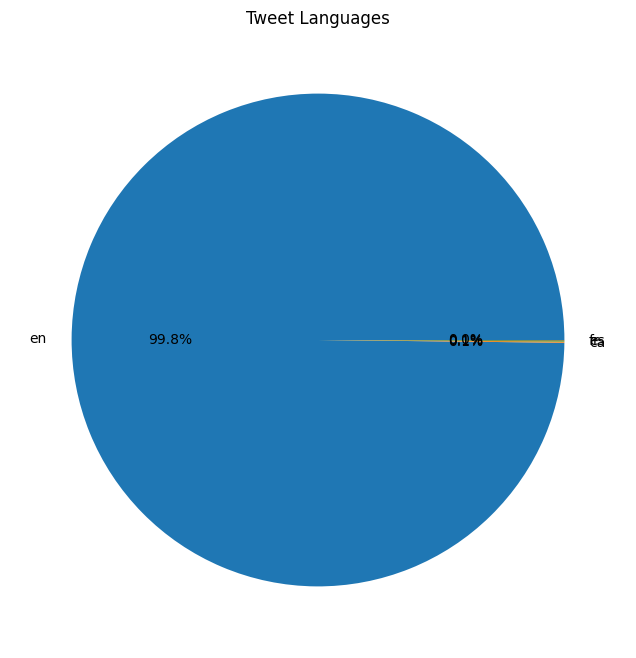

In [106]:
#  Pie chart of tweet languages
lang_counts = df['lang'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%')
plt.title('Tweet Languages')
plt.show()

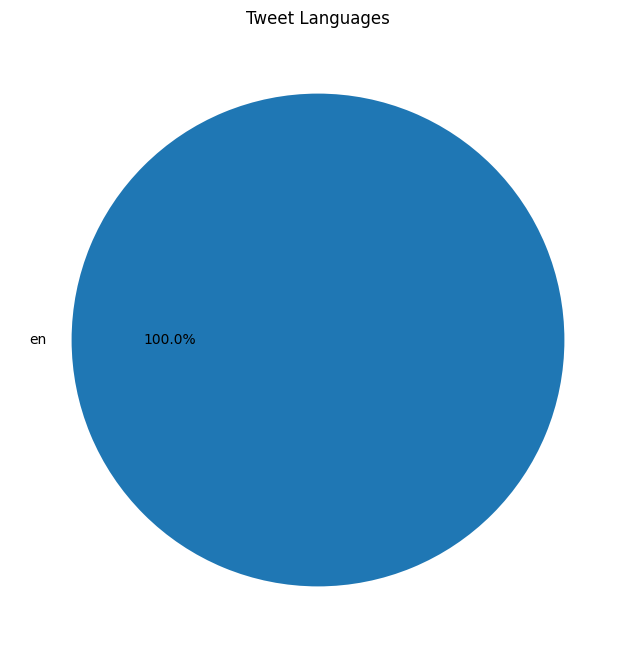

In [107]:
#  Keep only English language tweets
df = df[df['lang'] == 'en']
lang_counts = df['lang'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%')
plt.title('Tweet Languages')
plt.show()

In [109]:
# Removing unnecessary columns
columns_to_drop = ['user_profile_banner_url', 'user_description_urls', 'user_urls', 'user_pinned_tweet_ids']
df = df.drop(columns=columns_to_drop, axis=1)

In [110]:
# Fill missing values in 'user_location' with 'Unknown'
df['user_location'] = df['user_location'].fillna('Unknown')

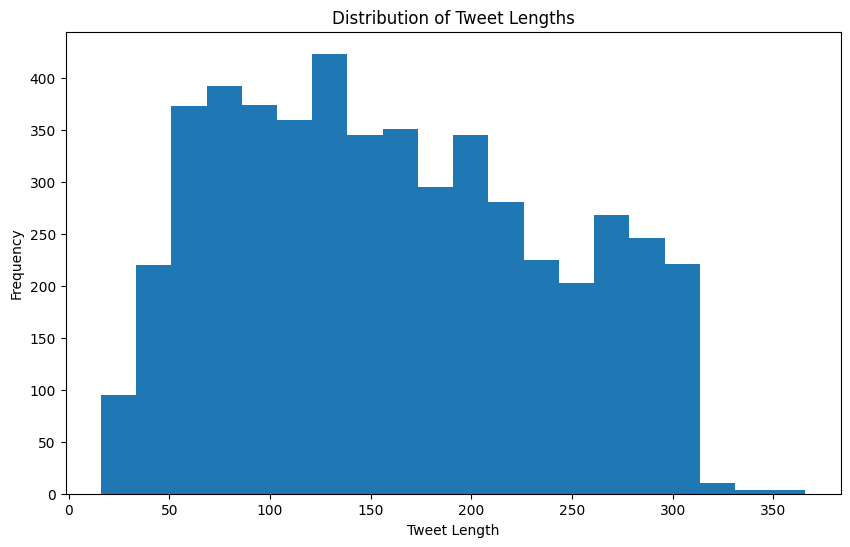

In [111]:
#  Histogram of tweet lengths
tweet_lengths = df['text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(tweet_lengths, bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

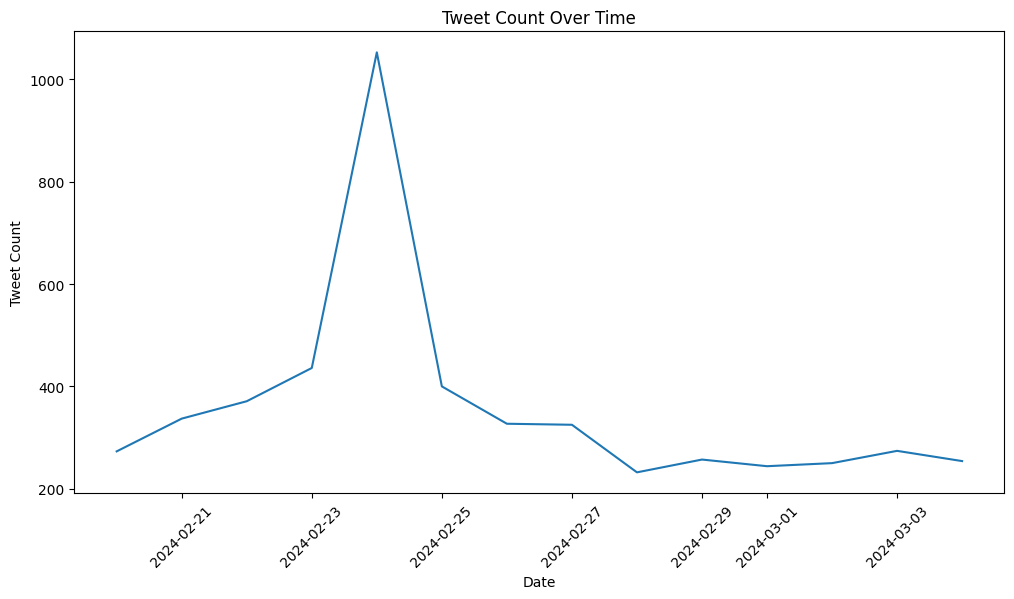

In [112]:

# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')


#  Line plot of tweet count over time
df['created_at'] = pd.to_datetime(df['created_at'])
tweet_counts = df.resample('D', on='created_at').size()
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count Over Time')
plt.xticks(rotation=45)
plt.show()

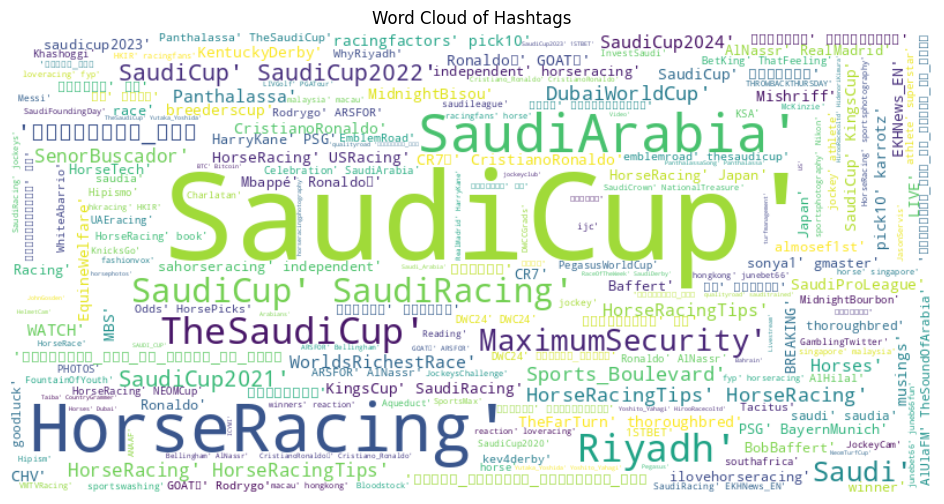

In [113]:
#  Word cloud of hashtags
hashtags = df['hashtags'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

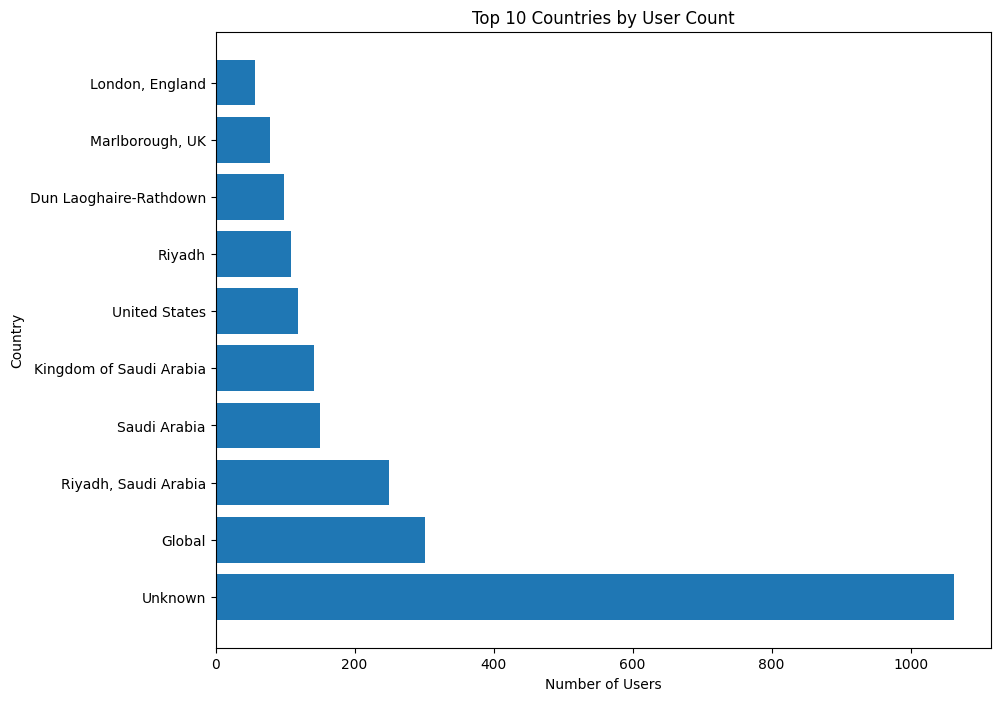

In [114]:
# Horizontal bar plot of top 10 countries by user count
user_country_counts = df['user_location'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
plt.barh(user_country_counts.index, user_country_counts)
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.title('Top 10 Countries by User Count')
plt.show()

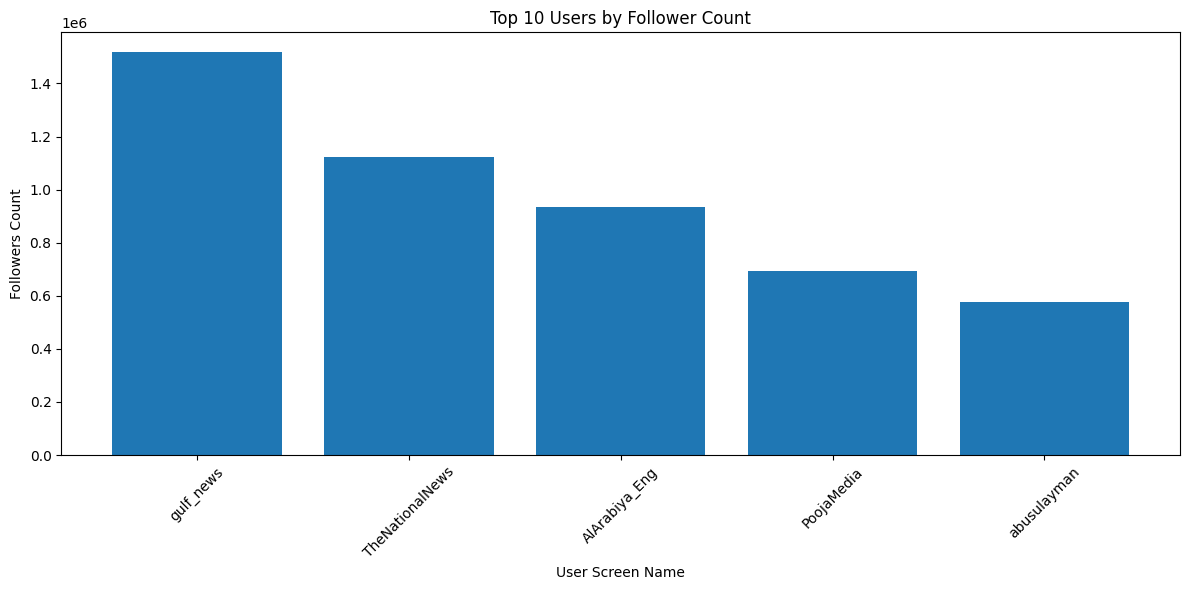

In [115]:
# Data Visualization : Bar plot of top 10 users by follower count
top_users = df.nlargest(10, 'user_followers_count')
plt.figure(figsize=(12, 6))
plt.bar(top_users['user_screen_name'], top_users['user_followers_count'])
plt.xlabel('User Screen Name')
plt.ylabel('Followers Count')
plt.title('Top 10 Users by Follower Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Sentiment Analysis**

In [116]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm


# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define the sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Perform sentiment analysis using BERT
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_labels[predicted_class]

# Use tqdm to apply the function with a progress bar
tqdm.pandas()
df['sentiment_label_bert'] = df['text'].progress_apply(predict_sentiment)

# Save the results to a new CSV file
df.to_csv('sentiment_results.csv', index=False)

print("Sentiment analysis completed. Results saved to 'sentiment_results.csv'.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 5033/5033 [19:14<00:00,  4.36it/s]


Sentiment analysis completed. Results saved to 'sentiment_results.csv'.


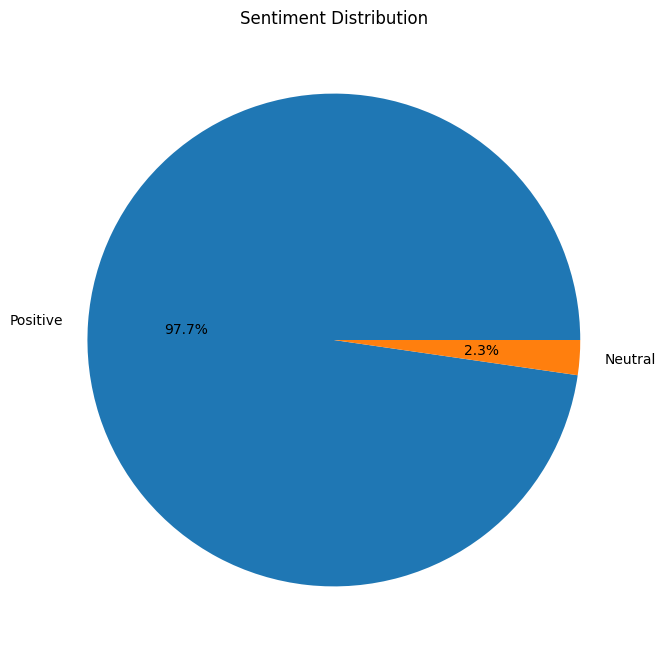

In [117]:
# Pie chart of sentiment distribution
sentiment_counts = df['sentiment_label_bert'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

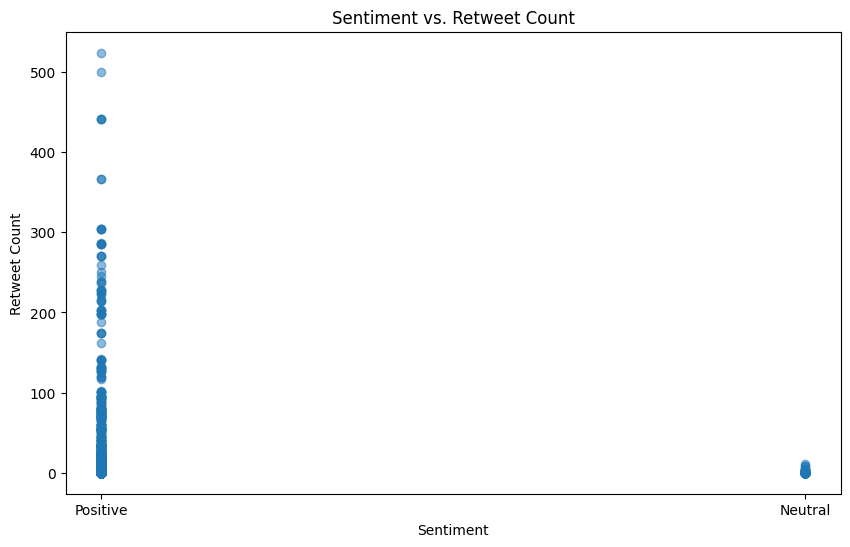

In [118]:
# Data Visualization : Scatter plot of sentiment vs. retweet count
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment_label_bert'], df['retweet_count'], alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.title('Sentiment vs. Retweet Count')
plt.show()